# Fallstudie (Case Study) Datenanalyse

Heute wollen wir einen Datensatz aufbereiten, explorieren, Erkenntnisse gewinnen, und diese am Ende auch visualisieren. Wir machen also eine komplette Datenanalyse Fallstudie.

## Modul-Importe

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

# Datenquelle - [Titanic](https://www.kaggle.com/competitions/titanic/data?select=train.csv)

`[titanic_test.csv, titanic_train.csv]`


## Weitere Quellen für frei verfügbare Datensätze:

Ja, es gibt viele frei verfügbare Testdatensätze, die sich hervorragend für eine Datenanalyse-Fallstudie eignen. Hier sind einige beliebte und nützliche Quellen:

1. **Kaggle Datasets**:
   - Kaggle bietet eine Vielzahl von Datensätzen, die kostenlos heruntergeladen und verwendet werden können. Diese Datensätze decken verschiedene Bereiche ab, darunter Wirtschaft, Gesundheit, Soziales und mehr.
   - [Kaggle Datasets](https://www.kaggle.com/datasets)

2. **UCI Machine Learning Repository**:
   - Das UCI Machine Learning Repository ist eine der bekanntesten Quellen für frei verfügbare Datensätze, die häufig in Machine-Learning- und Datenanalyse-Kursen verwendet werden.
   - [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

3. **Google Dataset Search**:
   - Google Dataset Search ist ein spezialisiertes Suchwerkzeug, mit dem man Datensätze zu verschiedenen Themen finden kann.
   - [Google Dataset Search](https://datasetsearch.research.google.com/)

4. **data.gov**:
   - Das Datenportal der US-Regierung bietet zahlreiche Datensätze zu verschiedenen Themen, darunter Umwelt, Bildung, Gesundheit und mehr.
   - [data.gov](https://www.data.gov/)

5. **European Union Open Data Portal**:
   - Das EU Open Data Portal bietet Datensätze aus verschiedenen Bereichen, die von den Institutionen und anderen Stellen der Europäischen Union gesammelt wurden.
   - [European Union Open Data Portal](https://data.europa.eu/euodp/en/data/)




## 1. Datenimport

In [9]:
df_train = pd.read_csv("Datensatz_titanic_train.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df_test = pd.read_csv("Datensatz_titanic_test.csv")
df_test

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 4


In [4]:
# Korrektur des Datenimports
df_test = pd.read_csv("Datensatz_titanic_test.csv",
                      sep=";",
                      header=1)
df_test

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,892,3,"Kelly; Mr, James",male,"34,5",0,0,330911,"7,8292",NaN,Q
1,1,893,3,"Wilkes; Mrs, James (Ellen Needs)",female,"47,0",1,0,363272,"7,0",NaN,S
2,2,894,2,"Myles; Mr, Thomas Francis",male,"62,0",0,0,240276,"9,6875",NaN,Q
3,3,895,3,"Wirz; Mr, Albert",male,"27,0",0,0,315154,"8,6625",NaN,S
4,4,896,3,"Hirvonen; Mrs, Alexander (Helga E Lindqvist)",female,"22,0",1,1,3101298,"12,2875",NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,413,1305,3,"Spector; Mr, Woolf",male,NaN,0,0,"A,5, 3236","8,05",NaN,S
414,414,1306,1,NaN,female,"39,0",0,0,PC 17758,"108,9",C105,C
415,415,1307,3,"Saether; Mr, Simon Sivertsen",male,"38,5",0,0,"SOTON/O,Q, 3101262","7,25",NaN,S
416,416,1308,3,"Ware; Mr, Frederick",male,NaN,0,0,359309,"8,05",NaN,S


---

## 2. Datenbereinigung


In [5]:
# Unnötige Spalten entfernen
df_test.drop(columns="Unnamed: 0", inplace=True)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly; Mr, James",male,"34,5",0,0,330911,"7,8292",NaN,Q
1,893,3,"Wilkes; Mrs, James (Ellen Needs)",female,"47,0",1,0,363272,"7,0",NaN,S
2,894,2,"Myles; Mr, Thomas Francis",male,"62,0",0,0,240276,"9,6875",NaN,Q
3,895,3,"Wirz; Mr, Albert",male,"27,0",0,0,315154,"8,6625",NaN,S
4,896,3,"Hirvonen; Mrs, Alexander (Helga E Lindqvist)",female,"22,0",1,1,3101298,"12,2875",NaN,S


In [6]:
# Komma durch Punkte ersetzen
df_test.replace(r"\,", ".", regex=True, inplace=True)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Kelly; Mr. James,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Wilkes; Mrs. James (Ellen Needs),female,47.0,1,0,363272,7.0,NaN,S
2,894,2,Myles; Mr. Thomas Francis,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Wirz; Mr. Albert,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Hirvonen; Mrs. Alexander (Helga E Lindqvist),female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,Spector; Mr. Woolf,male,NaN,0,0,A.5. 3236,8.05,NaN,S
414,1306,1,NaN,female,39.0,0,0,PC 17758,108.9,C105,C
415,1307,3,Saether; Mr. Simon Sivertsen,male,38.5,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
416,1308,3,Ware; Mr. Frederick,male,NaN,0,0,359309,8.05,NaN,S


In [7]:
# Semikolon durch Komma ersetzen
df_test.replace(r"\;", ",", regex=True, inplace=True)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S
414,1306,1,NaN,female,39.0,0,0,PC 17758,108.9,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,NaN,S


In [10]:
# Spalten Übereinstimmung überprüfen
for column in df_train.columns:
    if column not in df_test.columns:
        print(column)

Survived


In [11]:
# Form der Datensätze
print(df_train.shape, df_test.shape)

(891, 12) (418, 11)


In [12]:
# Ist PassengerID einzigartig?
# Ist es für ID Spalte geeignet?
print(df_train.shape[0] == df_train["PassengerId"].nunique())
print(df_test.shape[0] == df_test["PassengerId"].nunique())

True
True


In [13]:
# PassengerId als richtige ID Spalte verwenden
df_train.set_index("PassengerId", inplace=True)
df_test.set_index("PassengerId", inplace=True)

In [14]:
df_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S
1306,1,NaN,female,39.0,0,0,PC 17758,108.9,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,NaN,S


In [15]:
# Tabellen zusammenführen
df = pd.concat([df_train, df_test])
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S
1306,NaN,1,NaN,female,39.0,0,0,PC 17758,108.9,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,NaN,S


In [16]:
# Beschreibung der numerischen Spalten des kompletten Datensatzes
df.describe()

,Survived,Pclass,SibSp,Parch
count,891.000000,1309.000000,1309.000000,1309.000000
mean,0.383838,2.294882,0.498854,0.385027
std,0.486592,0.837836,1.041658,0.865560
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000
max,1.000000,3.000000,8.000000,9.000000


In [17]:
# Einige numerische Werte fehlen, vermutlich falscher Datentyp
df[["Age", "Fare"]] = df[["Age", "Fare"]].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1294 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1293 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [18]:
# Jetzt haben wir alle Spalten
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1293.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295337
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.995107
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [19]:
# Gibt es Dopplungen im Namen?
# Sind das die gleichen Personen?
df[df.duplicated(subset=["Name"], keep=False)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
290,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
697,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
933,NaN,1,NaN,male,NaN,0,0,113778,26.5500,D34,S
987,NaN,3,NaN,male,25.0,0,0,350033,7.7958,NaN,S
990,NaN,3,NaN,female,20.0,0,0,347471,7.8542,NaN,S
1011,NaN,2,NaN,female,29.0,1,0,SC/AH 29037,26.0000,NaN,S
1017,NaN,3,NaN,female,17.0,0,1,371362,16.1000,NaN,S


* Keine fehlenden Werte in keiner der beiden ID Spalten
* Keine Duplikate in der ID Spalte
* 2 doppelte Namen, 15 Namen fehlen


In [20]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# Index umbenennen
df.index.rename("FahrgastID", inplace=True)

In [22]:
# Spalten umbenennen
df.rename(columns={"Survived": "Ueberlebt",
                   "Pclass": "Passagierklasse",
                   "Age": "Alter",
                   "Sex": "Geschlecht",
                   "SibSp": "n_Geschwister_Partner",
                   "Parch": "n_Eltern_Kinder",
                   "Fare": "Ticketpreis",
                   "Cabin": "Kabine",
                   "Embarked": "Ausgangsort"},
          inplace=True)

df

,Ueberlebt,Passagierklasse,Name,Geschlecht,Alter,n_Geschwister_Partner,n_Eltern_Kinder,Ticket,Ticketpreis,Kabine,Ausgangsort
FahrgastID,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,NaN,female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


---

## 3. Explorative Datenanalyse


In [23]:
# Fehlende Werte: Wie viele? Wo?
df.isna().sum()

Ueberlebt                 418
Passagierklasse             0
Name                       15
Geschlecht                  0
Alter                     263
n_Geschwister_Partner       0
n_Eltern_Kinder             0
Ticket                      0
Ticketpreis                16
Kabine                   1014
Ausgangsort                 2
dtype: int64

In [24]:
### Möglichkeiten mit NaNs:
# 1. NaN Werte drinlassen und bei Funktionen drauf achten, dass sie richtig rechnen
# 2. Alle NaN Werte fallen lassen -> Schmeißt viele Daten weg
# 3. NaN ersetzen durch andere Werte (Imputation, Interpolation)


In [25]:
df.head()

,Ueberlebt,Passagierklasse,Name,Geschlecht,Alter,n_Geschwister_Partner,n_Eltern_Kinder,Ticket,Ticketpreis,Kabine,Ausgangsort
FahrgastID,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
# Fahrgast 3 hat im Ticket "STON". Bedeutet das Storno?
# Haben alle mit "STON" im Ticket überlebt?
df.loc[df["Ticket"].str.contains("STON"), "Ueberlebt"]

FahrgastID
3       1.0
116     0.0
143     1.0
174     0.0
217     1.0
244     0.0
383     0.0
401     1.0
404     0.0
415     1.0
434     0.0
580     1.0
591     0.0
637     0.0
665     1.0
730     0.0
745     1.0
817     0.0
910     NaN
937     NaN
989     NaN
1022    NaN
Name: Ueberlebt, dtype: float64

In [27]:
# Manche von denen haben Ueberlebt = 0 -> Die sind mit gefahren
# Also kein verlässlicher Wert fürs Überleben


### Fragestellungen:

* Haben mehr Leute aus der dritten oder aus der ersten Klasse überlebt?
* Wie hoch ist der Anteil an Überlebenden der verschiedenen Klassen?
* Wie viele Kinder / Säuglinge haben überlebt?
* Haben Leute aus Queenstown mehr bezahlt als die aus Cherbourg?

In [28]:
# Klasse zu Überlebenschance
df_class = df.groupby("Passagierklasse")["Ueberlebt"].value_counts()
df_class

Passagierklasse  Ueberlebt
1                1.0          136
                 0.0           80
2                0.0           97
                 1.0           87
3                0.0          372
                 1.0          119
Name: count, dtype: int64

In [29]:
# Anteil Überlebender aus erster Klasse
df_class[1, 1.0] / (df_class[1, 1.0] + df_class[1, 0.0])

0.6296296296296297

In [30]:
# Anteil Überlebender aus zweiter Klasse
df_class[2, 1.0] / (df_class[2, 1.0] + df_class[2, 0.0])

0.47282608695652173

In [31]:
# Anteil Überlebender aus dritter Klasse
df_class[3, 1.0] / (df_class[3, 1.0] + df_class[3, 0.0])

# Passagierklasse hat großen Einfluss auf die Überlebenschance
# Reiche Leute überleben eher

0.24236252545824846

In [32]:
# Ticketpreis per Ausgangsort
df.groupby("Ausgangsort")["Ticketpreis"].mean()

Ausgangsort
C    62.467499
Q    12.446142
S    27.415378
Name: Ticketpreis, dtype: float64

In [33]:
# Klassifizieren von Altersgruppen
df["Altersklasse"] = pd.cut(df["Alter"],
                            bins=[0, 1, 18, 99],
                            labels=["Saeugling", "Kind", "Erwachsener"])

df

,Ueberlebt,Passagierklasse,Name,Geschlecht,Alter,n_Geschwister_Partner,n_Eltern_Kinder,Ticket,Ticketpreis,Kabine,Ausgangsort,Altersklasse
FahrgastID,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Erwachsener
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Erwachsener
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Erwachsener
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Erwachsener
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Erwachsener
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
1306,NaN,1,NaN,female,39.0,0,0,PC 17758,108.9000,C105,C,Erwachsener
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Erwachsener


In [34]:
# Welche Altersruppe hat eher überlebt?
df_age = df.groupby("Altersklasse", observed=False)["Ueberlebt"].value_counts()
df_age

Altersklasse  Ueberlebt
Saeugling     1.0           12
              0.0            2
Kind          0.0           67
              1.0           58
Erwachsener   0.0          355
              1.0          220
Name: count, dtype: int64

In [35]:
# Anteil Überlebender Säuglinge
df_age["Saeugling", 1.0] / (df_age["Saeugling", 1.0] + df_age["Saeugling", 0.0])

0.8571428571428571

In [36]:
# Anteil Überlebender Kinder
df_age["Kind", 1.0] / (df_age["Kind", 1.0] + df_age["Kind", 0.0])

0.464

In [37]:
# Anteil Überlebender Erwachsener
df_age["Erwachsener", 1.0] / (df_age["Erwachsener", 1.0] + df_age["Erwachsener", 0.0])

0.3826086956521739

---

## 4. Visualisierung

In [69]:
df["Ueberlebt"] = df["Ueberlebt"].replace({1.0: "Ja", 0.0: "Nein"})

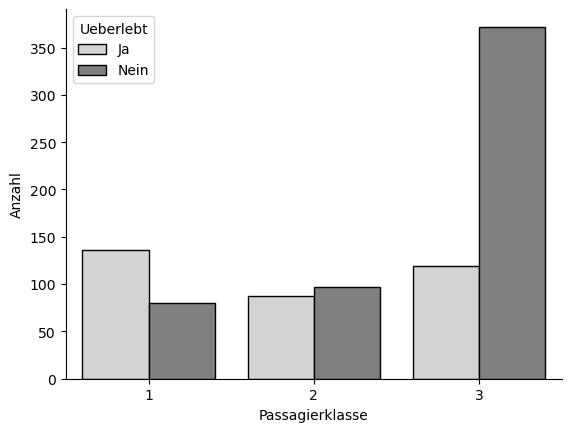

In [77]:
counts = df.groupby("Passagierklasse", as_index=False)["Ueberlebt"] \
           .value_counts() 

sns.barplot(counts,
            x="Passagierklasse",
            y="count",
            hue="Ueberlebt",
            palette=["lightgrey", "grey"],
            ec="k")

plt.ylabel("Anzahl")
sns.despine()

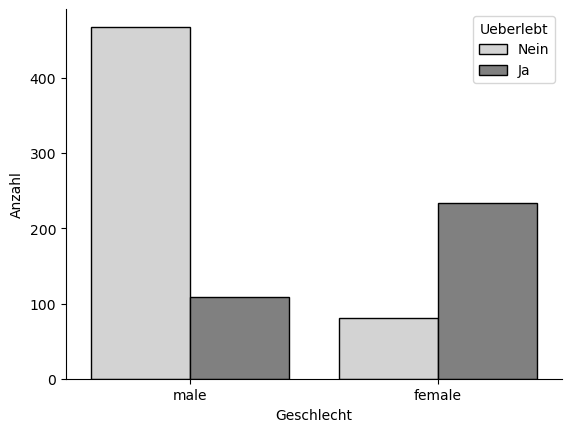

In [76]:
# Überlebende nach Geschlecht
sns.countplot(df,
              x="Geschlecht",
              hue="Ueberlebt",
              palette=["lightgrey", "grey"],
              ec="k")

plt.ylabel("Anzahl")
sns.despine()